# Development of Model

### Importing libraries and Data
Importing transformed and cleand data for model development.

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

You might be seeing some unusual imports above, which is a additional lib named imbalanced-learn which is part of `sklearn-contrib` projects. Basically it's a library which is made for using several techniques made for imbalanced data. Like ourseleves dataset. So, above we are importing few two algorithms for training model. And several other algorithms from scikit-learn for training, and then we will plot different models performance and test accuracy.

In [262]:
df = pd.read_csv('../Data/ML Dataset after transformtion.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,2,0,2,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,2,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,2,0,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [263]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

We will be using several AI and few ML algorithms for classification of churn data.

### All algorithms
We will be using Pipeline for almost all algorithms which has distance calculation invloved. So, for these algos we will use Standard Scalar to normalize all column values. This will may increase accuracy in distance algorithms and speed up convergence in NN (neural network) algorithm. For trees algorithms we will go with traditional process.

In [264]:
# Support Vector Machine
# Naive Bayes
# K nearest neighbours
random_forest = RandomForestClassifier()  # Random forest
ada_boost = AdaBoostClassifier()  # Ada boost
extra_trees = ExtraTreesClassifier()  # Extra Trees (ensemble)
gradient_boosting = GradientBoostingClassifier()  # gradient boosting
decision_tree = DecisionTreeClassifier()  # Decision tree
extra_tree = ExtraTreeClassifier()  # Extra tree (tree)
# Multi layer perceptron (NN)
balanced_rf = BalancedRandomForestClassifier()  # Balanced Random forest
balanced_bagging = BalancedBaggingClassifier()  # Balanced Bagging

### Spliting training and testing data
Let's split the dataset in training and testing sets.

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
y = df.Churn
X = df.drop('Churn', axis=1)

In [267]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [268]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,2,0,2,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,2,2,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,2,0,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [269]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [270]:
print(f"X_train and y_train size are : {len(X_train)} and {len(y_train)}")
print(f"X_test and y_test size are : {len(X_test)} and {len(y_test)}")

X_train and y_train size are : 5634 and 5634
X_test and y_test size are : 1409 and 1409


### Training different models

In [271]:
all_accuracy = []
all_classification_report = []

#### K nearest neighbour classifier

We will be using a simple pipeline for KNN Classifer with Standard scaler 

In [272]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [273]:
knn_pipeline = Pipeline(
    steps=[("scalar", StandardScaler()), ("knn", KNeighborsClassifier())]
)

In [274]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('knn', KNeighborsClassifier())])

In [275]:
y_pred = knn_pipeline.predict(X_test)

In [276]:
from sklearn.metrics import accuracy_score, classification_report

In [277]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
class_report = classification_report(y_true=y_test, y_pred=y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.7714691270404542
Classification report : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.57      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



#### SVM (Support Vector Machine) Classifier

In [278]:
svm_pipeline = Pipeline(steps=[("scaler", StandardScaler()), ("svc", SVC(kernel="poly"))])

svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='poly'))])

In [279]:
y_pred = svm_pipeline.predict(X_test)

In [280]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report  : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.8069552874378992
Classification report  : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#### Naive Bayes

In [281]:
naive_bayes = Pipeline(steps=[("scalar", StandardScaler()), ("NB", GaussianNB())])
naive_bayes.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('NB', GaussianNB())])

In [282]:
y_pred = naive_bayes.predict(X_test)

In [283]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.7452093683463449
Classification report : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1036
           1       0.51      0.83      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



#### Random Forest

In [284]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [285]:
y_pred = random_forest.predict(X_test)

In [286]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.7913413768630234
Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



#### Ada Boost

In [287]:
ada_boost.fit(X_train, y_train)

d:\Work\Development\Python\InnoByte Internship\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [288]:
y_pred = ada_boost.predict(X_test)

In [289]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.815471965933286
Classification report : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



#### Extra Trees (Ensumble) classifier

In [290]:
extra_trees.fit(X_train, y_train)

ExtraTreesClassifier()

In [291]:
y_pred = extra_trees.predict(X_test)

In [292]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.7764371894960965
Classification report : 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1036
           1       0.60      0.46      0.52       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



#### Gradient Boosting

In [293]:
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [294]:
y_pred = gradient_boosting.predict(X_test)

In [295]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.8076650106458482
Classification report : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#### Decision tree

In [296]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [297]:
y_pred = decision_tree.predict(X_test)

In [298]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.7097232079489
Classification report : 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1036
           1       0.45      0.48      0.47       373

    accuracy                           0.71      1409
   macro avg       0.63      0.64      0.63      1409
weighted avg       0.71      0.71      0.71      1409



#### Extra tree (Single Tree)

In [299]:
extra_tree.fit(X_train, y_train)

ExtraTreeClassifier()

In [300]:
y_pred = gradient_boosting.predict(X_test)

In [301]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.8076650106458482
Classification report : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#### MLP Multi layer perceptron

In [302]:
mlp = Pipeline(steps=[('scalar', StandardScaler()), ('MLP', MLPClassifier())])
mlp.fit(X_train, y_train)

d:\Work\Development\Python\InnoByte Internship\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scalar', StandardScaler()), ('MLP', MLPClassifier())])

In [303]:
y_pred = mlp.predict(X_test)

In [304]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.7970191625266146
Classification report : 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.58      0.60       373

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.79      1409



#### Balanced Random forest

In [305]:
balanced_rf.fit(X_train, y_train)

d:\Work\Development\Python\InnoByte Internship\venv\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
d:\Work\Development\Python\InnoByte Internship\venv\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
d:\Work\Development\Python\InnoByte Internship\venv\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

BalancedRandomForestClassifier()

In [306]:
y_pred = balanced_rf.predict(X_test)

In [307]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.7565649396735273
Classification report : 
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



#### Balanced Bagging Classifier

In [308]:
balanced_bagging.fit(X_train, y_train)

BalancedBaggingClassifier()

In [309]:
y_pred = gradient_boosting.predict(X_test)

In [310]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy : {acc}")
print(f"Classification report : \n{class_report}")

all_accuracy.append(acc)
all_classification_report.append(class_report)

Accuracy : 0.8076650106458482
Classification report : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# Model Evaluation

### Ploting all models accuracy

In [311]:
model_names = [
    "KNN",
    "SVM",
    "NB",
    "RF",
    "Ada_B",
    "Extra Tress (E)",
    "Gradient B",
    "DT",
    "Extra tree",
    "MLP",
    "B_RF",
    "B_bagging",
]

C:\Users\sid90\AppData\Local\Temp\ipykernel_18216\2209844872.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(model_names))  # 'tab20' is a color map with 20 distinct colors


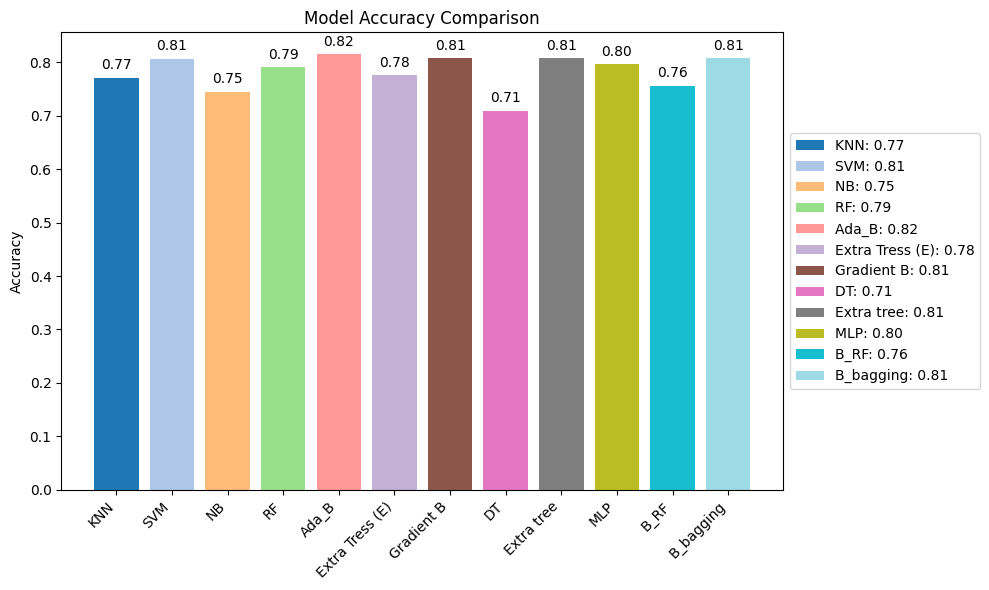

In [312]:

colors = plt.cm.get_cmap('tab20', len(model_names))  # 'tab20' is a color map with 20 distinct colors

fig, ax = plt.subplots(figsize=(10, 6))

for i, acc in enumerate(all_accuracy):
    ax.bar(model_names[i], acc, color=colors(i), label=f'{model_names[i]}: {acc:.2f}')
    ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')

plt.xticks(rotation=45, ha='right')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.show()

The highest accuracy we got from all these models is 82 percent, which is from using Ada Boost Classifier. \
Let's save all these models in `/Models` folder.